# GATHERING

In [2]:
#import libraries
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from IPython.display import Image


### Enhanced Twitter Archive

In [3]:
#working with the actual dataset

In [4]:
#import of the enhanced twitter dataset
twitter_enhanced_dataset=pd.read_csv(r'C:\Users\PNM\O-Folder\Data-Wrangle and Analysis\twitter-archive-enhanced.csv')

In [5]:
twitter_enhanced_dataset

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
#working with the actual dataset

### Image Predictions Dataset

In [7]:
#import image prediction dataset
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

In [8]:
#creation of a folder and check if it already existing
folder_name = 'image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [9]:
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
        file.write(response.content)

In [10]:
#confirming if the file is saved
os.listdir(folder_name)

['image-predictions.tsv']

In [11]:
#read the file 
image_prediction=pd.read_csv('image_prediction\image-predictions.tsv',sep='\t')

In [12]:
#view the image prediction dataset
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [13]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## In case we need additional data for the Twitter API

In [14]:
#we can use twitter developer data to run.
#consumer_key = 'My KEY'
#consumer_secret = 'My SECRET'
#access_token = 'My TOKEN'
#access_secret = 'My Access SECRET'
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)
#api = tweepy.API(auth)

In [15]:
#gathering of the twitter api and we get only the tweet ID, retweet count and favourite count valaues only.

listing=[]
count=0
filing='tweet-json.txt'
with open(filing, encoding='utf-8') as file:
    for the_file in file:
        count +=1
        json_file=file.readline()
        mydata=(json.loads(the_file))
        tweet_id=mydata['id']
        retweet_count=mydata['retweet_count']
        favorite_count=mydata['favorite_count']
        listing.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count})
        
        twitter_api=pd.DataFrame(listing,columns=['tweet_id','retweet_count','favorite_count'])

# ACCESSING

#### Twitter Enhanced Archive

In [16]:
#we view only the first five rows
twitter_enhanced_dataset.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [17]:
#View 10 rows of the dataset
twitter_enhanced_dataset.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2010,672248013293752320,NaN,NaN,2015-12-03 02:56:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",10/10 for dog. 7/10 for cat. 12/10 for human. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672248013...,10,10,None,None,None,None,None
18,888554962724278272,NaN,NaN,2017-07-22 00:23:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphus. He's powering up. Attempting ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888554962...,13,10,Ralphus,None,None,None,None
949,752309394570878976,NaN,NaN,2016-07-11 01:11:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everyone needs to watch this. 1...,6.753544e+17,4.196984e+09,2015-12-11 16:40:19 +0000,https://twitter.com/dog_rates/status/675354435...,13,10,None,None,None,None,None
402,824325613288833024,NaN,NaN,2017-01-25 18:38:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Retweet the h*ck out of this 13/10 pupper #Bel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/824325613...,13,10,None,None,None,pupper,None
371,828408677031882754,NaN,NaN,2017-02-06 01:03:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bear. He went outside to play in the s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828408677...,12,10,Bear,None,None,None,None
270,841314665196081154,NaN,NaN,2017-03-13 15:47:01 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Max. There's no way in h*ck you're tak...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841314665...,13,10,Max,None,None,None,None
1390,700151421916807169,NaN,NaN,2016-02-18 02:54:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",If a pupper gave that to me I'd probably start...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700151421...,11,10,None,None,None,pupper,None
947,752519690950500352,NaN,NaN,2016-07-11 15:07:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hopefully this puppo on a swing will help get ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752519690...,11,10,None,None,None,None,puppo
745,780092040432480260,NaN,NaN,2016-09-25 17:10:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Hank. He's mischievous ...,7.533757e+17,4.196984e+09,2016-07-13 23:48:51 +0000,https://twitter.com/dog_rates/status/753375668...,8,10,Hank,None,None,None,None
1909,674422304705744896,NaN,NaN,2015-12-09 02:56:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ava. She doesn't understand flowers. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674422304...,12,10,Ava,None,None,None,None


In [18]:
#Get more info about the datatype,count and total entries for the dataset
twitter_enhanced_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
#This help us understand the datset better by viewing the mean,standard deviation, maximumm etc 
twitter_enhanced_dataset.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
#check for any duplicated data in the tweet ID column
twitter_enhanced_dataset.tweet_id.nunique()

2356

In [21]:
#Check for empty values in the retweet status column
twitter_enhanced_dataset.retweeted_status_user_id.isna().value_counts()

True     2175
False     181
Name: retweeted_status_user_id, dtype: int64

In [22]:
# Get the sum of each columns having empty or null values
twitter_enhanced_dataset.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [23]:
# we view the twitter rating numerators to check if there are problems
twitter_enhanced_dataset.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

#### Quality Issue 5
* There are some rating for numerators that are above 10 which is not right

In [24]:
# we view the twitter rating denominators to check if there are problems
twitter_enhanced_dataset.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [25]:
#we view regualar expression that may be having conflicing values on the numerators or denominators
with pd.option_context('max_colwidth', 200):
    display(twitter_enhanced_dataset[twitter_enhanced_dataset['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

c:\users\pnm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [26]:
#we attempt to view the unique values of the dog age grouping
group=twitter_enhanced_dataset[['tweet_id','doggo','floofer','pupper','puppo']]
group

,tweet_id,doggo,floofer,pupper,puppo
0,892420643555336193,None,None,None,None
1,892177421306343426,None,None,None,None
2,891815181378084864,None,None,None,None
3,891689557279858688,None,None,None,None
4,891327558926688256,None,None,None,None
...,...,...,...,...,...
2351,666049248165822465,None,None,None,None
2352,666044226329800704,None,None,None,None
2353,666033412701032449,None,None,None,None
2354,666029285002620928,None,None,None,None


In [27]:
with pd.option_context('max_colwidth', 200):
    display(twitter_enhanced_dataset[['tweet_id', 'source']])

,tweet_id,source
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
...,...,...
2351,666049248165822465,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
2352,666044226329800704,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
2353,666033412701032449,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
2354,666029285002620928,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"


## Image Prediction

In [28]:
#we view the image prediction value for the top 5 entries
image_prediction.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1351,759846353224826880,https://pbs.twimg.com/media/CouEOZhWAAAgFpE.jpg,1,Sussex_spaniel,0.355395,True,vizsla,0.141094,True,otterhound,0.092198,True
1908,852672615818899456,https://pbs.twimg.com/media/C9VNNp1XkAEWRFb.jpg,1,golden_retriever,0.711235,True,otterhound,0.068235,True,Sussex_spaniel,0.046562,True
1494,783334639985389568,https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg,2,Cardigan,0.593858,True,Shetland_sheepdog,0.130611,True,Pembroke,0.100842,True
1434,773670353721753600,https://pbs.twimg.com/media/CryhFC0XEAA9wp_.jpg,1,Old_English_sheepdog,0.969311,True,Maltese_dog,0.013243,True,soft-coated_wheaten_terrier,0.004857,True
568,678380236862578688,https://pbs.twimg.com/media/CWoXOfSUAAA4u8g.jpg,1,dogsled,0.088540,False,snowmobile,0.057291,False,Samoyed,0.047601,True
391,673576835670777856,https://pbs.twimg.com/media/CVkGjsxU8AA5OYX.jpg,1,teddy,0.255210,False,Christmas_stocking,0.098285,False,pajama,0.072735,False
1068,715928423106027520,https://pbs.twimg.com/media/Ce99GhLW8AAHG38.jpg,1,pug,0.976685,True,French_bulldog,0.019663,True,bull_mastiff,0.002278,True


In [29]:
#we get the information of the dataset about the datatype,count and the total entries for tthe dataset
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


array([[<AxesSubplot:title={'center':'tweet_id'}>,
        <AxesSubplot:title={'center':'img_num'}>],
       [<AxesSubplot:title={'center':'p1_conf'}>,
        <AxesSubplot:title={'center':'p2_conf'}>],
       [<AxesSubplot:title={'center':'p3_conf'}>, <AxesSubplot:>]],
      dtype=object)

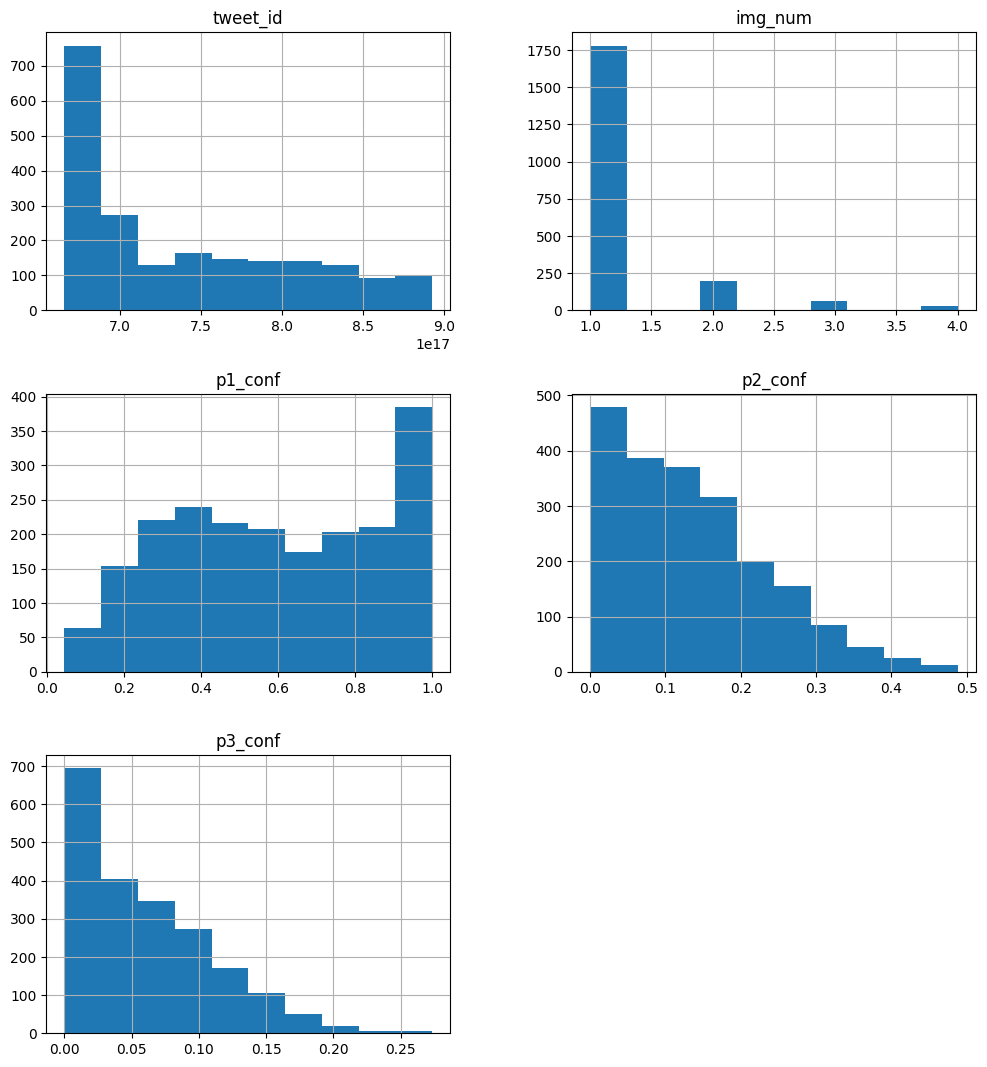

In [30]:
#we try to understand the dataset better by viewing the histogram for each coolumn 
image_prediction.hist(figsize=(12,13))

In [31]:
#to check is there is null value in each column
image_prediction.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [32]:
#to check if there is duplicated images in the column
image_prediction.jpg_url.duplicated(keep=False).value_counts()

False    1943
True      132
Name: jpg_url, dtype: int64

In [33]:
#To check for the count of each value in the image number column
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [34]:
#check if there exist duplicates in the tweet id column
image_prediction.tweet_id.duplicated(keep=False).value_counts()


False    2075
Name: tweet_id, dtype: int64

In [35]:
##check if there exist duplicates in the p1 dog column

image_prediction.p1_dog.duplicated(keep=False).sum()

2075

In [36]:
##check if there exist duplicates in the p2 dog column

image_prediction.p2_dog.duplicated(keep=False).value_counts()

True    2075
Name: p2_dog, dtype: int64

In [37]:
##check if there exist duplicates in the p3 dog column

image_prediction.p3_dog.duplicated(keep=False).value_counts()


True    2075
Name: p3_dog, dtype: int64

In [38]:
#check for values in p1_dog,p2_dog and p3_dog that are false or otherwise
image_prediction[["p1_dog","p2_dog","p3_dog"]].apply(lambda x:
    (x[0] == False and x[1] == False and x[2] == False) 
    , axis = 1).value_counts()

False    1751
True      324
dtype: int64

## Twitter API

In [39]:
twitter_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,891815181378084864,4328,25461
2,891327558926688256,9774,41048
3,890971913173991426,2158,12041
4,890609185150312448,4429,28226


In [40]:
twitter_api.sample(8)

,tweet_id,retweet_count,favorite_count
1011,671891728106971137,618,1415
729,695051054296211456,885,2918
652,707377100785885184,1214,3603
747,692530551048294401,474,2021
1140,667211855547486208,258,516
682,702671118226825216,634,2398
58,870063196459192321,8840,37771
71,864197398364647424,9616,31459


In [41]:
# view the information of the dataset
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1177 non-null   int64
 1   retweet_count   1177 non-null   int64
 2   favorite_count  1177 non-null   int64
dtypes: int64(3)
memory usage: 27.7 KB


In [42]:
#check if there is any null values in the dataset
twitter_api.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [43]:
#check for duplicates on the tweet id column
twitter_api.tweet_id.duplicated().sum()

0

In [44]:
#to check the shape of the dataset
twitter_api.shape

(1177, 3)

### Quality Issue

* twitter_enhanced_dataset- Null values for column 2,3,7,8,9
* twitter_enhanced_dataset- incomplete data for index 1,2,6,7,8,9
* twitter_enhanced_dataset- retweet status id have duplictes
* twitter_enhanced_dataset- there are empty values in 6 columns
* twitter_enhanced_dataset- incorrect datatype for index 8
* twitter_enhanced_dataset-- All the tweet id are unique so no duplicate* the above contain records of rating of numerators that were not correctly recorded
* twitter_enhanced_dataset- split of the retweeted_status_timestamp column
* twitter_enhanced_dataset- replacing the datatype of  the retweeted_status_timestamp
* image prediction- the names of (p1,p2,p3) are having underscore hence it may  not be easy to understand
* image prediction- Some of the images have duplicates
* image-prediction- The img_num column wasn't important

### Tidyness Issues for twitter_archive_enhanced

* twitter_enhanced_dataset- The dog age group could have been merged to reduce the number of column
* twitter_enhanced_dataset- The source column need only the source of information not the whole link
* image_prediction- uncatogorising of the p1,p2,p3 values 
* image_prediction- p1_conf,p2_conf,p3_conf should have been grouped

# CLEANING

## twitter_enhanced_dataset

In [45]:
#making a copy of all three dataset this dataset for reference purpose
twitter_enhanced_dataset_cleaning=twitter_enhanced_dataset.copy()
image_prediction_cleaning=image_prediction.copy()
twitter_api_cleaning=twitter_api.copy()

## Define
* Drop all columns that are not important for this analysis

## Code

In [46]:
#we drop all unneessary columns to reduce the size
twitter_enhanced_dataset_cleaning=twitter_enhanced_dataset_cleaning.drop(['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'],axis=1)

## Test

In [47]:
twitter_enhanced_dataset_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   text                2356 non-null   object
 3   rating_numerator    2356 non-null   int64 
 4   rating_denominator  2356 non-null   int64 
 5   name                2356 non-null   object
 6   doggo               2356 non-null   object
 7   floofer             2356 non-null   object
 8   pupper              2356 non-null   object
 9   puppo               2356 non-null   object
dtypes: int64(3), object(7)
memory usage: 184.2+ KB


## Define
* Change the values of the numerator rating column that are not correct 

## Code

In [48]:
with pd.option_context('max_colwidth', 200):
    display(twitter_enhanced_dataset_cleaning[twitter_enhanced_dataset_cleaning['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

c:\users\pnm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [49]:
#we manually change the numerators that are wrongly gathered based on the values on the text
twitter_enhanced_dataset_cleaning.loc[twitter_enhanced_dataset_cleaning.tweet_id==883482846933004288,'rating_numerator']=13.5
twitter_enhanced_dataset_cleaning.loc[twitter_enhanced_dataset_cleaning.tweet_id==681340665377193984,'rating_numerator']=9.5
twitter_enhanced_dataset_cleaning.loc[twitter_enhanced_dataset_cleaning.tweet_id==680494726643068929,'rating_numerator']=11.26
twitter_enhanced_dataset_cleaning.loc[twitter_enhanced_dataset_cleaning.tweet_id==786709082849828864,'rating_numerator']=9.75
twitter_enhanced_dataset_cleaning.loc[twitter_enhanced_dataset_cleaning.tweet_id==778027034220126208,'rating_numerator']=11.27

## Test

In [50]:
with pd.option_context('max_colwidth', 200):
    display(twitter_enhanced_dataset_cleaning[twitter_enhanced_dataset_cleaning['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

c:\users\pnm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75.00,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10


## Define 
* we create a rating column which is the division of the nemerator and denomiator


## Code

In [51]:
twitter_enhanced_dataset_cleaning['rating']=twitter_enhanced_dataset_cleaning.rating_numerator/twitter_enhanced_dataset_cleaning.rating_denominator


## Test

In [52]:
twitter_enhanced_dataset_cleaning.sample(7)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
1688,681523177663676416,2015-12-28 17:12:42 +0000,This is Carly. She's actually 2 dogs fused tog...,12.0,10,Carly,None,None,None,None,1.2
110,871102520638267392,2017-06-03 20:33:19 +0000,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,14.0,10,None,doggo,None,None,None,1.4
491,813800681631023104,2016-12-27 17:36:16 +0000,This is Sky. She's learning how to roll her R'...,12.0,10,Sky,None,None,None,None,1.2
541,806242860592926720,2016-12-06 21:04:11 +0000,RT @dog_rates: This is Dave. He's currently in...,12.0,10,Dave,None,None,None,None,1.2
2201,668645506898350081,2015-11-23 04:21:26 +0000,Incredibly rare dog here. Good at bipedalism. ...,11.0,10,None,None,None,None,None,1.1
1891,674764817387900928,2015-12-10 01:37:23 +0000,These two pups are masters of camouflage. Very...,10.0,10,None,None,None,None,None,1.0
835,768193404517830656,2016-08-23 21:09:14 +0000,Meet Gerald. He's a fairly exotic doggo. Floof...,8.0,10,Gerald,doggo,None,None,None,0.8


## Define 

* Create a column which conatins  the differnt age group of the dogs


## Code

In [53]:
twitter_enhanced_dataset_cleaning=pd.melt(twitter_enhanced_dataset_cleaning,id_vars=['tweet_id','timestamp','text','rating_numerator','rating_denominator','name','rating'],value_vars=['doggo','floofer','pupper','puppo'],value_name='dog_group')

In [54]:
twitter_enhanced_dataset_cleaning.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,rating,variable,dog_group
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,1.3,doggo,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,1.3,doggo,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,1.2,doggo,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,1.3,doggo,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,1.2,doggo,None


## Define 

* we  drop the variable column 

## Code

In [55]:
twitter_enhanced_dataset_cleaning.drop('variable', inplace=True,axis=1)

## Test

In [56]:
twitter_enhanced_dataset_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            9424 non-null   int64  
 1   timestamp           9424 non-null   object 
 2   text                9424 non-null   object 
 3   rating_numerator    9424 non-null   float64
 4   rating_denominator  9424 non-null   int64  
 5   name                9424 non-null   object 
 6   rating              9424 non-null   float64
 7   dog_group           9424 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 589.1+ KB


## Define
* Drop all duplicates that exist because of the dog_group column created


## Code

In [57]:
twitter_enhanced_dataset_cleaning=twitter_enhanced_dataset_cleaning.sort_values('dog_group')

In [58]:
twitter_enhanced_dataset_cleaning=twitter_enhanced_dataset_cleaning.drop_duplicates(subset='tweet_id', keep='last')

## Test 

In [59]:
twitter_enhanced_dataset_cleaning.dog_group.value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: dog_group, dtype: int64

In [60]:
twitter_enhanced_dataset_cleaning.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,rating,dog_group
2259,667550904950915073,2015-11-20 03:51:52 +0000,RT @dogratingrating: Exceptional talent. Origi...,12.0,10,None,1.2,None
2260,667550882905632768,2015-11-20 03:51:47 +0000,RT @dogratingrating: Unoriginal idea. Blatant ...,5.0,10,None,0.5,None
2261,667549055577362432,2015-11-20 03:44:31 +0000,Never seen dog like this. Breathes heavy. Tilt...,1.0,10,None,0.1,None
2262,667546741521195010,2015-11-20 03:35:20 +0000,Here is George. George took a selfie of his ne...,9.0,10,George,0.9,None
2263,667544320556335104,2015-11-20 03:25:43 +0000,"This is Kial. Kial is either wearing a cape, w...",10.0,10,Kial,1.0,None


In [61]:
twitter_enhanced_dataset_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   int64  
 1   timestamp           2356 non-null   object 
 2   text                2356 non-null   object 
 3   rating_numerator    2356 non-null   float64
 4   rating_denominator  2356 non-null   int64  
 5   name                2356 non-null   object 
 6   rating              2356 non-null   float64
 7   dog_group           2356 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 165.7+ KB


#### Image Prediction

In [62]:
#we view randomly the image prediction dataset
image_prediction_cleaning.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
259,670782429121134593,https://pbs.twimg.com/media/CU8ZDu9WwAADg3N.jpg,1,Chihuahua,0.952963,True,French_bulldog,0.036575,True,Boston_bull,0.001977,True
1582,796759840936919040,https://pbs.twimg.com/media/Cw6o1JQXcAAtP78.jpg,1,American_Staffordshire_terrier,0.463996,True,Staffordshire_bullterrier,0.155566,True,Weimaraner,0.137587,True
1828,835574547218894849,https://pbs.twimg.com/media/C5iOnigWcAAU3Ry.jpg,1,Staffordshire_bullterrier,0.610655,True,muzzle,0.132138,False,American_Staffordshire_terrier,0.109544,True
1579,796177847564038144,https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg,1,golden_retriever,0.600276,True,Labrador_retriever,0.140798,True,seat_belt,0.087355,False
1638,806629075125202948,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1551,793135492858580992,https://pbs.twimg.com/media/CwHIg61WIAApnEV.jpg,1,bakery,0.737041,False,saltshaker,0.052396,False,teddy,0.046593,False
1835,837012587749474308,https://pbs.twimg.com/media/C52pYJXWgAA2BEf.jpg,1,toilet_tissue,0.186387,False,cowboy_hat,0.158555,False,sombrero,0.149470,False
1900,851464819735769094,https://pbs.twimg.com/media/C9ECujZXsAAPCSM.jpg,2,web_site,0.919649,False,menu,0.026306,False,crossword_puzzle,0.003482,False
758,688789766343622656,https://pbs.twimg.com/media/CY8SocAWsAARuyh.jpg,1,American_Staffordshire_terrier,0.599660,True,Staffordshire_bullterrier,0.380976,True,bull_mastiff,0.003889,True
1280,750132105863102464,https://pbs.twimg.com/media/CmkBKuwWgAAamOI.jpg,1,toy_poodle,0.478018,True,miniature_poodle,0.207458,True,croquet_ball,0.085879,False


## Define 
* Create dog_breed that checks for the best predicted value is p1 then prints it else it checks for it and print it


## Code

In [63]:
def predicted_image(image_prediction_cleaning):
    if image_prediction_cleaning.p1_dog==True:
        return image_prediction_cleaning.p1
    elif image_prediction_cleaning.p2_dog==True:
        return image_prediction_cleaning.p2
    elif image_prediction_cleaning.p3_dog==True:
        return image_prediction_cleaning.p3
    else:
        return 'Error'

# Test

In [64]:
image_prediction_cleaning['dog_breed']=image_prediction_cleaning.apply(predicted_image,axis=1)

## Define 
* Create dog_breed that checks for the best predicted confidence level is p1 then prints it's value else it checks for others

## Code

In [65]:
def predicted_confidence(image_prediction_cleaning):
    if image_prediction_cleaning['p1_dog']==True:
        return image_prediction_cleaning.p1_conf
    elif image_prediction_cleaning.p2_dog==True:
        return image_prediction_cleaning.p2_conf
    elif image_prediction_cleaning.p3_dog==True:
        return image_prediction_cleaning.p3_conf
    else:
        return 'error'

## Test

In [66]:
image_prediction_cleaning['Confidence_level']=image_prediction_cleaning.apply(predicted_confidence,axis=1)

In [67]:
image_prediction_cleaning.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,Confidence_level
333,672160042234327040,https://pbs.twimg.com/media/CVP9_beUEAAwURR.jpg,1,pug,0.561027,True,French_bulldog,0.222114,True,Labrador_retriever,0.065456,True,pug,0.561027
1698,816816676327063552,https://pbs.twimg.com/media/C1XqbhXXUAElpfI.jpg,1,malamute,0.668164,True,Pembroke,0.105033,True,Siberian_husky,0.077875,True,malamute,0.668164
1060,715009755312439296,https://pbs.twimg.com/media/Cew5kyOWsAA8Y_o.jpg,1,dingo,0.310903,False,Chihuahua,0.142288,True,Cardigan,0.103945,True,Chihuahua,0.142288
115,667937095915278337,https://pbs.twimg.com/media/CUT9PuQWwAABQv7.jpg,1,hamster,0.172078,False,guinea_pig,0.094924,False,Band_Aid,0.059995,False,Error,error
42,666739327293083650,https://pbs.twimg.com/media/CUC74aTWoAInZey.jpg,1,miniature_poodle,0.546933,True,cocker_spaniel,0.165255,True,toy_poodle,0.095959,True,miniature_poodle,0.546933
1110,724004602748780546,https://pbs.twimg.com/media/CgwuWCeW4AAsgbD.jpg,3,Siamese_cat,0.950526,False,pug,0.018877,True,quilt,0.007628,False,pug,0.018877
1449,776201521193218049,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,1,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True,Rottweiler,0.502228
1328,757400162377592832,https://pbs.twimg.com/media/CoLTbbzXYAElNM6.jpg,1,seat_belt,0.523926,False,golden_retriever,0.087800,True,Tibetan_mastiff,0.075127,True,golden_retriever,0.0878
1766,826848821049180160,https://pbs.twimg.com/media/C3mOnZ_XUAAjr2V.jpg,4,Great_Pyrenees,0.858764,True,golden_retriever,0.023526,True,Pekinese,0.017104,True,Great_Pyrenees,0.858764
309,671538301157904385,https://pbs.twimg.com/media/CVHIhi2WsAEgdKk.jpg,1,park_bench,0.194211,False,water_bottle,0.071870,False,beacon,0.053433,False,Error,error


## Define 
* We  remove error values in the dog_breed column


## Code

In [68]:
image_prediction_cleaning=image_prediction_cleaning.loc[image_prediction_cleaning['dog_breed']!= 'Error']

## Test 

In [69]:
image_prediction_cleaning.dog_breed.value_counts()

golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
pug                      65
                       ... 
Scotch_terrier            1
EntleBucher               1
Japanese_spaniel          1
standard_schnauzer        1
Bouvier_des_Flandres      1
Name: dog_breed, Length: 113, dtype: int64

In [70]:
image_prediction_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1751 non-null   int64  
 1   jpg_url           1751 non-null   object 
 2   img_num           1751 non-null   int64  
 3   p1                1751 non-null   object 
 4   p1_conf           1751 non-null   float64
 5   p1_dog            1751 non-null   bool   
 6   p2                1751 non-null   object 
 7   p2_conf           1751 non-null   float64
 8   p2_dog            1751 non-null   bool   
 9   p3                1751 non-null   object 
 10  p3_conf           1751 non-null   float64
 11  p3_dog            1751 non-null   bool   
 12  dog_breed         1751 non-null   object 
 13  Confidence_level  1751 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 169.3+ KB


In [71]:
# we check for the list of the dataset so as to nable us drop unecessary columns
list(image_prediction_cleaning)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_breed',
 'Confidence_level']

In [72]:
best_prediction = image_prediction_cleaning.groupby(['p1_dog'])['p1_dog'].count()

## Define 
* Drop all columns that we will not be using

## Code

In [73]:
# we drop all columns that are not used
image_prediction_cleaning=image_prediction_cleaning.drop(columns={'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog'},axis=1)

## Test

In [74]:
image_prediction_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          1751 non-null   int64 
 1   jpg_url           1751 non-null   object
 2   img_num           1751 non-null   int64 
 3   dog_breed         1751 non-null   object
 4   Confidence_level  1751 non-null   object
dtypes: int64(2), object(3)
memory usage: 82.1+ KB


## Twitter API

In [75]:
twitter_api_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1177 non-null   int64
 1   retweet_count   1177 non-null   int64
 2   favorite_count  1177 non-null   int64
dtypes: int64(3)
memory usage: 27.7 KB


In [76]:
twitter_api_cleaning.describe()

,tweet_id,retweet_count,favorite_count
count,1.177000e+03,1177.000000,1177.000000
mean,7.427463e+17,3222.255735,8260.755310
std,6.856773e+16,5106.835873,12088.982006
min,6.660293e+17,0.000000,0.000000
25%,6.783997e+17,634.000000,1499.000000
50%,7.195514e+17,1483.000000,3705.000000
75%,7.993088e+17,3737.000000,10202.000000
max,8.924206e+17,52360.000000,132810.000000


## STORING

## Define
* We create a new dataframe that is used to merge the three dataset


## Code

In [77]:
df=pd.merge(twitter_enhanced_dataset_cleaning,image_prediction_cleaning, on='tweet_id',how='outer').merge( twitter_api, on='tweet_id',how='outer')                 



## Test

In [78]:
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,rating,dog_group,jpg_url,img_num,dog_breed,Confidence_level,retweet_count,favorite_count
0,667550904950915073,2015-11-20 03:51:52 +0000,RT @dogratingrating: Exceptional talent. Origi...,12.0,10,None,1.2,None,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1.0,vizsla,0.000081,NaN,NaN
1,667550882905632768,2015-11-20 03:51:47 +0000,RT @dogratingrating: Unoriginal idea. Blatant ...,5.0,10,None,0.5,None,NaN,NaN,NaN,NaN,34.0,0.0
2,667549055577362432,2015-11-20 03:44:31 +0000,Never seen dog like this. Breathes heavy. Tilt...,1.0,10,None,0.1,None,NaN,NaN,NaN,NaN,NaN,NaN
3,667546741521195010,2015-11-20 03:35:20 +0000,Here is George. George took a selfie of his ne...,9.0,10,George,0.9,None,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1.0,toy_poodle,0.787424,138.0,355.0
4,667544320556335104,2015-11-20 03:25:43 +0000,"This is Kial. Kial is either wearing a cape, w...",10.0,10,Kial,1.0,None,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,1.0,Pomeranian,0.412893,NaN,NaN


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   int64  
 1   timestamp           2356 non-null   object 
 2   text                2356 non-null   object 
 3   rating_numerator    2356 non-null   float64
 4   rating_denominator  2356 non-null   int64  
 5   name                2356 non-null   object 
 6   rating              2356 non-null   float64
 7   dog_group           2356 non-null   object 
 8   jpg_url             1751 non-null   object 
 9   img_num             1751 non-null   float64
 10  dog_breed           1751 non-null   object 
 11  Confidence_level    1751 non-null   object 
 12  retweet_count       1177 non-null   float64
 13  favorite_count      1177 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 276.1+ KB


## Define
* We drop duplicates of the tweet_id



## Code

In [80]:
df=df.drop_duplicates('tweet_id')

## Test

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   int64  
 1   timestamp           2356 non-null   object 
 2   text                2356 non-null   object 
 3   rating_numerator    2356 non-null   float64
 4   rating_denominator  2356 non-null   int64  
 5   name                2356 non-null   object 
 6   rating              2356 non-null   float64
 7   dog_group           2356 non-null   object 
 8   jpg_url             1751 non-null   object 
 9   img_num             1751 non-null   float64
 10  dog_breed           1751 non-null   object 
 11  Confidence_level    1751 non-null   object 
 12  retweet_count       1177 non-null   float64
 13  favorite_count      1177 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 276.1+ KB


In [82]:
#we check if the text has duplicates
df.text.duplicated().value_counts()

False    2356
Name: text, dtype: int64

## Define
* Store the new datset into a new file termed twitter_archive_master_csv


## Code

In [83]:
df.to_csv('twitter_archive_master',index=False,header=False,encoding='utf-8')

## Test

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   int64  
 1   timestamp           2356 non-null   object 
 2   text                2356 non-null   object 
 3   rating_numerator    2356 non-null   float64
 4   rating_denominator  2356 non-null   int64  
 5   name                2356 non-null   object 
 6   rating              2356 non-null   float64
 7   dog_group           2356 non-null   object 
 8   jpg_url             1751 non-null   object 
 9   img_num             1751 non-null   float64
 10  dog_breed           1751 non-null   object 
 11  Confidence_level    1751 non-null   object 
 12  retweet_count       1177 non-null   float64
 13  favorite_count      1177 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 276.1+ KB


In [85]:
df.retweet_count.isna().sum()

1179

### Analysis and Visualization

#### Insights:

    Which are the most common dog stage?

    What is the correlation between retweet and favourite counts?

In [86]:
#We check for the counts of each dog age group
df.dog_group.value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: dog_group, dtype: int64

In [87]:
df2=df.query("dog_breed=='golden_retriever'")
df2.jpg_url.sample(4)

507       https://pbs.twimg.com/media/Cfuba6NW4AIeMHk.jpg
2069    https://pbs.twimg.com/ext_tw_video_thumb/75145...
1869      https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg
2050      https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg
Name: jpg_url, dtype: object

In [88]:
Image(url='https://pbs.twimg.com/media/CjbV-lEWgAAr6WY.jpg')

In [89]:
Image(url='https://pbs.twimg.com/media/C2PjgjQXcAAc4Uu.jpg')

In [90]:
Image(url='https://pbs.twimg.com/media/CqBiMAgWAAEJKgI.jpg')

In [91]:
df3=df.query("dog_breed=='Scotch_terrier'")
df3.jpg_url.sample(1)

448    https://pbs.twimg.com/media/CZDT-mZWsAEK9BH.jpg
Name: jpg_url, dtype: object

In [92]:
Image(url='https://pbs.twimg.com/media/CZDT-mZWsAEK9BH.jpg')

In [93]:
#we plot a bar chart to show the top 10 dog breeds based on their rating
import plotly.express as px
colour=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
df_bar=df.groupby(['dog_breed'])['rating'].size().to_frame().sort_values(['rating'],ascending=False).head(10).reset_index().plot.barh(x='dog_breed',y='rating',color=colour,legend=False)
plt.xlabel=('rating for dog breeds')
plt.ylabel=('dog breed')
plt.title('Histogram showing top ten(10) dog breed per rating')

ModuleNotFoundError: No module named 'plotly'

In [ ]:
#we plot a bar chart to show the top 10 dog breeds based on their rating
import plotly.express as px
colour=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
df_bar=df.groupby(['dog_breed'])['rating'].size().to_frame().sort_values(['rating'],ascending=False).tail(10).reset_index().plot.barh(x='dog_breed',y='rating',color=colour,legend=False)
plt.xlabel=('rating for dog breeds')
plt.ylabel=('dog breed')
plt.title('Histogram showing bottom ten(10) dog breed per rating')

In [ ]:
df.groupby(['dog_breed','favorite_count']).size().to_frame().sort_values(['favorite_count'],ascending=False).head(10).reset_index().plot.bar(y='favorite_count',x='dog_breed',legend=False)
plt.ylabel=('favorite count for dog breeds')
plt.xlabel=('dog breed')
plt.title('Bar chart showing top ten(10) dog breed per favorite count')

In [ ]:
df.groupby(['dog_breed','retweet_count']).size().to_frame().sort_values(['retweet_count'],ascending=False).head(10).reset_index().plot.bar(y='retweet_count',x='dog_breed',legend=False)
plt.ylabel=('retweet count for dog breeds')
plt.xlabel=('dog breed')
plt.title('Bar chart showing top ten(10) dog breed per retweet count')

In [ ]:
#we describe the data based on the dog group which will show the mean,median,standard deviation etc for each column
df.groupby('dog_breed').describe().sort_values(['dog_breed'],ascending=False).head(20).reset_index()